In [36]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colormaps
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize



(0.0, 3.0)

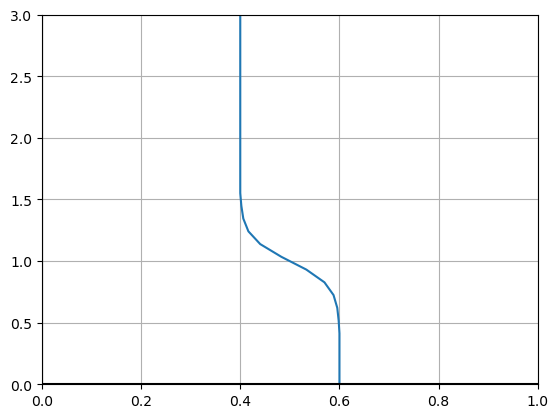

In [29]:
def compute_nb_distr(
                nb_max,
                nb_min,
                nb_max_depth,
                nb_min_depth,
                N,
                max_depth
            ):
    
    nb = np.zeros(N)
    z = np.linspace(0, max_depth, N)

    mid = (nb_max_depth + nb_min_depth) / 2
        
    nb = (1 / (1 + np.exp(-(z - mid) * 10 / (nb_min_depth - nb_max_depth)))) * (nb_min - nb_max) + nb_max
    
    nb[np.argwhere(z<=nb_max_depth)] = nb_max
    nb[np.argwhere(z>=nb_min_depth)] = nb_min
        
    return nb

z = np.linspace(0, 3, 30)

nb = compute_nb_distr(
    0.6,
    0.4,
    0.5,
    1.5,
    
    len(z),
    
    np.max(z),
)

# nb = (1 / (1 + np.exp(-(z - 0.5)*10)))

plt.plot(nb, z)
plt.grid()
plt.vlines(0, -5, 5, 'k')
plt.hlines(0, -5, 5, 'k')

plt.xlim((0, 1))
plt.ylim((0, 3))


[Text(1, 0, 'start'), Text(1, 1, 'end')]

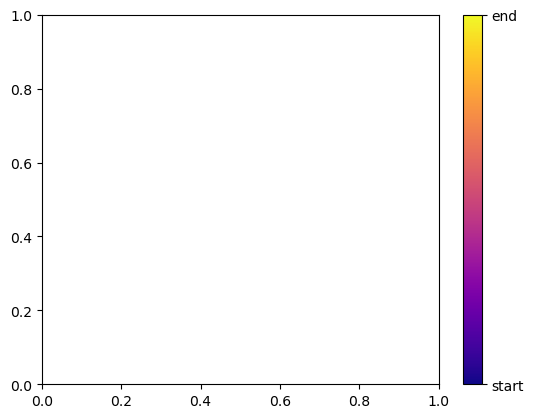

In [40]:
cmap = colormaps['plasma']

colors = cmap(np.linspace(0, 1, 100))

norm = Normalize()

sm = ScalarMappable(norm, cmap=cmap)



fig, ax = plt.subplots()


cbar = plt.colorbar(sm, ax=ax, ticks=[0, 1])

cbar.ax.set_yticklabels(['start', 'end'])